## Подготовка данных в pandas

In [1]:
# отключаем предупреждения
import warnings
warnings.filterwarnings("ignore")

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('C:/Trees/Churn_logreg.csv', encoding = 'cp1251', sep = ';')

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [5]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['longdist', 'internat', 'local', 'income']:
    if i in data.columns:
        data[i] = data[i].str.replace(',', '.').astype('float')
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается


In [6]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


In [7]:
# смотрим статистики для количественных переменных
data.describe()

,longdist,internat,local,age,children,income
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000


In [8]:
def make_conj(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('object') + " + " + df[feature2].astype('object')

In [9]:
make_conj(data, 'gender', 'marital')

In [10]:
# смотрим статистики для категориальных переменных,
# кроме зависимой переменной churn
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital,gender_marital
count,4430,4427,4429,4430,4427,4427
unique,2,2,4,2,2,4
top,Нет,Бюджетный,CC,Женский,Женат,Женский + Женат
freq,3054,2244,2561,2244,2625,1352


In [11]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['Нет' nan 'Да']
['Бюджетный' nan 'Бесплатный']
['CC' nan 'Auto' 'CH' 'CD']
['Женский' 'Мужской' nan]
['Женат' 'Одинокий' nan]
['Женский + Женат' 'Мужской + Одинокий' nan 'Женский + Одинокий'
 'Мужской + Женат']


In [12]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna = False))

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64
Женский + Женат       1352
Мужской + Женат       1273
Мужской + Одинокий     912
Женский + Одинокий     890
NaN                      4
Name: gender_marital, dtype: int64


In [13]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = 'CC'
data['pay'].value_counts(dropna = False)

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 13 columns):
longdist          4430 non-null float64
internat          4427 non-null float64
local             4428 non-null float64
int_disc          4430 non-null object
billtype          4427 non-null object
pay               4429 non-null object
age               4428 non-null float64
gender            4430 non-null object
marital           4427 non-null object
children          4430 non-null float64
income            4430 non-null float64
churn             4431 non-null object
gender_marital    4427 non-null object
dtypes: float64(6), object(7)
memory usage: 450.1+ KB


In [15]:
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается,Женский + Женат
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается,Мужской + Одинокий
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается,NaN
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается,Мужской + Одинокий
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается,Женский + Одинокий


In [16]:
# поделим возраст на длительность междугородних звонков в минутах
data['ratio'] = data['age']/data['longdist']
# заменяем бесконечные значения на 1
data['ratio'].replace([np.inf, -np.inf], 1, inplace = True)

In [17]:
# поделим длительность междугородних звонков в минутах на
# длительность международных звонков в минутах
data['ratio2'] = data['longdist']/data['internat']
# заменяем бесконечные значения на 0
data['ratio2'].replace([np.inf, -np.inf], 0, inplace = True)

In [18]:
# поделим доход на возраст
data['ratio3'] = data['income']/data['age']
# заменяем бесконечные значения на 0
data['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)

In [19]:
# поделим возраст на количество детей
data['ratio4'] = data['age']/data['children']
# заменяем бесконечные значения на 0
data['ratio4'].replace([np.inf, -np.inf], 0, inplace = True)

In [20]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac = 0.7, random_state = 200)
test = data.drop(train.index)

In [21]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

longdist            1
internat            4
local               2
int_disc            0
billtype            4
pay                 2
age                 2
gender              1
marital             3
children            1
income              1
churn               0
gender_marital      3
ratio               3
ratio2            336
ratio3              2
ratio4              2
dtype: int64

In [22]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

longdist            0
internat            0
local               1
int_disc            1
billtype            0
pay                 0
age                 1
gender              0
marital             1
children            0
income              0
churn               0
gender_marital      1
ratio               1
ratio2            161
ratio3              1
ratio4              1
dtype: int64

In [23]:
numerical_columns = train.dtypes[train.dtypes != 'object'].index 
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace = True)
    test[i].fillna(train[i].mean(), inplace = True)

In [24]:
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace = True)
    test[i].fillna(train[i].value_counts().index[0], inplace = True)

In [25]:
for c in categorical_columns:
    print(train[c].value_counts(dropna=False))

Нет    2139
Да      963
Name: int_disc, dtype: int64
Бюджетный     1569
Бесплатный    1533
Name: billtype, dtype: int64
CC      1810
CH       688
Auto     604
Name: pay, dtype: int64
Мужской    1553
Женский    1549
Name: gender, dtype: int64
Женат       1821
Одинокий    1281
Name: marital, dtype: int64
Женский + Женат       930
Мужской + Женат       891
Мужской + Одинокий    660
Женский + Одинокий    621
Name: gender_marital, dtype: int64


In [26]:
train.isnull().sum()

longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64

In [27]:
test.isnull().sum()

longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64

In [28]:
train.replace({0: 0.5}, inplace=True)
test.replace({0: 0.5}, inplace=True)

In [29]:
pd.set_option('max_colwidth', 800)

In [30]:
from scipy.stats import boxcox
for i in numerical_columns:  
    train[i], fitted_lambda = boxcox(train[i])     
    test[i] = boxcox(test[i], fitted_lambda)   

In [31]:
# печатаем названия столбцов до и после
# дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dummies = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dummies.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dummies = pd.get_dummies(test)
print('Переменные после get_dummies:\n', list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий']
Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio

In [32]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# создаем обучающий и контрольный массивы признаков
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
X_train = train_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']
X_test = test_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']

In [33]:
# смотрим распределение классов зависимой 
# переменной в выборках (проценты)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.56383
1    0.43617
Name: churn_Уходит, dtype: float64
0    0.562077
1    0.437923
Name: churn_Уходит, dtype: float64


In [34]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение модели логистической регрессии с помощью класса LogisticRegression

In [35]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression (по сути
# задаем настройки панели)
logreg = LogisticRegression().fit(X_train_scaled, y_train)
# печатаем значения правильности
print('Правильность на обучающей выборке: {:.3f}'.format(logreg.score(X_train_scaled, y_train)))
print('Правильность на контрольной выборке: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

Правильность на обучающей выборке: 0.810
Правильность на контрольной выборке: 0.808


In [36]:
# импортируем функцию roc_auc_score для вычисления AUC
from sklearn.metrics import roc_auc_score
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.885
AUC на контрольной выборке: 0.888


In [37]:
# конкатенируем датафреймы по строкам
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

In [38]:
# убедимся, что конкатенция выполнена верно
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4431 entries, 2157 to 4430
Data columns (total 25 columns):
longdist                             4431 non-null float64
internat                             4431 non-null float64
local                                4431 non-null float64
age                                  4431 non-null float64
children                             4431 non-null float64
income                               4431 non-null float64
ratio                                4431 non-null float64
ratio2                               4431 non-null float64
ratio3                               4431 non-null float64
ratio4                               4431 non-null float64
int_disc_Да                          4431 non-null uint8
int_disc_Нет                         4431 non-null uint8
billtype_Бесплатный                  4431 non-null uint8
billtype_Бюджетный                   4431 non-null uint8
pay_Auto                             4431 non-null uint8
pay_CC         

In [39]:
# импортируем функцию и класс для выполнения
# перекрестной проверки
from sklearn.model_selection import cross_val_score, KFold
# создаем экземпляр класса KFold, по сути задаем 
# количество блоков перекрестной проверки
kfold = KFold(n_splits = 10)
# выполняем перекрестную проверку, вычисляем правильность,
# усредненную по 10 контрольным блокам
scores_acc_logreg = cross_val_score(logreg, X, y, cv = kfold)
print('Среднее значение правильности перекрестной проверки: {:.2f}'.
      format(scores_acc_logreg.mean()))

Среднее значение правильности перекрестной проверки: 0.81


In [40]:
# выполняем перекрестную проверку, вычисляем AUC,
# усредненную по 10 контрольным блокам
scores_auc_logreg = cross_val_score(logreg, X, y, scoring = 'roc_auc', cv = kfold)
print('Среднее значение AUC перекрестной проверки: {:.2f}'.
      format(scores_auc_logreg.mean()))

Среднее значение AUC перекрестной проверки: 0.88


In [41]:
# пишем функцию, выполняющую биннинг
def user_bin(train, number):
    tv = 'churn'
    col_list = []  
    iv_list = []
    bins_list = [] 
    groups_list = []      
    a= 0.01  
    for var_name in train: 
        # используем для биннинга переменные с более чем 24 уникальными значениями 
        if(len(train[var_name].unique()) >= 24):
            col_list.append(var_name)  
    print('У нас ' + str(len(col_list)) + ' переменных, пригодных для биннинга')    
    for var_name in col_list:  
        num = number  
        bins = np.linspace(train[var_name].min(), train[var_name].max(), num) 
        rounded_bins = np.round(bins, 2)
        groups = np.digitize(train[var_name], bins)        
        biv = pd.crosstab(groups, train[tv])   
        # умножаем на 1.0, чтобы преобразовать во float и добавляем "a=0.01", чтобы избежать деления на ноль
        WoE = np.log((1.0*biv['Остается']/sum(biv['Остается']) + a) / (1.0*biv['Уходит']/sum(biv['Уходит']) + a))
        IV = sum(((1.0*biv['Остается']/sum(biv['Остается']) + a) - (1.0*biv['Уходит']/sum(biv['Уходит']) + a))*np.log((1.0*biv['Остается']/sum(biv['Остается']) + a) / (1.0*biv['Уходит']/sum(biv['Уходит']) + a)))
        iv_list.append(IV) 
        bins_list.append(num)        
        groups_list.append(rounded_bins)
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV' : iv_list,
                           'Количество_бинов' : bins_list})    
    return(result.sort_values(by = 'IV', ascending = False))

In [42]:
user_bin(train, 10)

У нас 9 переменных, пригодных для биннинга


,Переменная,Бины,IV,Количество_бинов
6,ratio2,"[-9.01, -7.81, -6.61, -5.41, -4.2, -3.0, -1.8, -0.6, 0.61, 1.81]",0.756717,10
0,longdist,"[-1.46, -0.06, 1.35, 2.75, 4.16, 5.56, 6.97, 8.37, 9.77, 11.18]",0.433322,10
1,internat,"[-13.08, -11.46, -9.84, -8.22, -6.6, -4.98, -3.35, -1.73, -0.11, 1.51]",0.375355,10
5,ratio,"[-0.49, -0.14, 0.21, 0.56, 0.9, 1.25, 1.6, 1.95, 2.3, 2.64]",0.308490,10
2,local,"[-2.16, -0.42, 1.32, 3.06, 4.8, 6.54, 8.28, 10.02, 11.76, 13.5]",0.230167,10
3,age,"[11.4, 15.41, 19.42, 23.43, 27.44, 31.45, 35.46, 39.47, 43.48, 47.49]",0.119664,10
7,ratio3,"[1.25, 7.19, 13.13, 19.06, 25.0, 30.94, 36.87, 42.81, 48.75, 54.68]",0.067524,10
8,ratio4,"[-0.64, 0.38, 1.4, 2.42, 3.44, 4.46, 5.47, 6.49, 7.51, 8.53]",0.033225,10
4,income,"[40.64, 695.07, 1349.49, 2003.91, 2658.33, 3312.76, 3967.18, 4621.6, 5276.02, 5930.45]",0.021932,10


In [43]:
# создадим бины для переменной longdist
bins = [-np.inf, -0.06, 1.35, 2.75, 4.16, 5.56, 6.97, 8.37, 9.77, np.inf]
# выполняем биннинг переменной longdist
train['longdistcat'] = pd.cut(train['longdist'], bins).astype('object')
test['longdistcat'] = pd.cut(test['longdist'], bins).astype('object')

In [44]:
# выведем частоты категорий новой 
# переменной longdistcat
train['longdistcat'].value_counts()

(9.77, inf]      510
(8.37, 9.77]     481
(-inf, -0.06]    420
(5.56, 6.97]     408
(6.97, 8.37]     398
(4.16, 5.56]     286
(2.75, 4.16]     254
(1.35, 2.75]     190
(-0.06, 1.35]    155
Name: longdistcat, dtype: int64

Обратите внимание на квадратные и круглые скобки интервалов. Интервал закрывается либо слева, либо справа, то есть соответствующий конец включается в данный интервал. Согласно принятой в математике нотации интервалов круглая скобка означает, что соответствующий конец не включается (открыт), а квадратная – что включается (закрыт). В данном случае интервалы открыты слева и закрыты справа. Первый интервал (-inf, -0.06] содержит наблюдения со значениями переменной от наименьшего до -0.06 включительно, второй интервал (-0.06, 1.35] содержит наблюдения, в которых значение переменной больше -0.06, но при этом меньше или равно 1.35, и так далее.

In [45]:
# выполняем биннинг переменной age
bins = [-np.inf, 15, 19, 23, 27, 32, 36, 40, 44, np.inf]
train['agecat'] = pd.cut(train['age'], bins).astype('object')
test['agecat'] = pd.cut(test['age'], bins).astype('object')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 19 columns):
longdist          3102 non-null float64
internat          3102 non-null float64
local             3102 non-null float64
int_disc          3102 non-null object
billtype          3102 non-null object
pay               3102 non-null object
age               3102 non-null float64
gender            3102 non-null object
marital           3102 non-null object
children          3102 non-null float64
income            3102 non-null float64
churn             3102 non-null object
gender_marital    3102 non-null object
ratio             3102 non-null float64
ratio2            3102 non-null float64
ratio3            3102 non-null float64
ratio4            3102 non-null float64
longdistcat       3102 non-null object
agecat            3102 non-null object
dtypes: float64(10), object(9)
memory usage: 484.7+ KB


In [47]:
# печатаем названия столбцов до и после
# дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dum = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dum.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dum = pd.get_dummies(test)
print('Переменные после get_dummies:\n', list(test_dum.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'longdistcat', 'agecat'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий', 'longdistcat_(-inf, -0.06]', 'longdistcat_(-0.06, 1.35]', 'longdistcat_(1.35, 2.75]', 'longdistcat_(2.75, 4.16]', 'longdistcat_(4.16, 5.56]', 'longdistcat_(5.56, 6.97]', 'longdistcat_(6.97, 8.37]', 'longdistcat_(8.37, 9.77]', 'longdistcat_(9.77, inf]', 'agecat_(-inf, 15.0]', 'age

In [48]:
# создаем обучающий и контрольный массивы признаков
train_dum.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
test_dum.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
X_tr = train_dum.loc[:, 'longdist':'agecat_(44.0, inf]']
X_tst = test_dum.loc[:, 'longdist':'agecat_(44.0, inf]']

In [49]:
# применяем RobustScaler
scaler.fit(X_tr)
X_train_scaled2 = scaler.transform(X_tr)
X_test_scaled2 = scaler.transform(X_tst)

In [50]:
# строим логистическую регрессию
logreg2 = LogisticRegression().fit(X_train_scaled2, y_train)
from sklearn.metrics import roc_auc_score
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, logreg2.predict_proba(X_train_scaled2)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, logreg2.predict_proba(X_test_scaled2)[:, 1])))

AUC на обучающей выборке: 0.906
AUC на контрольной выборке: 0.902


In [51]:
# а теперь создадим взаимодействия между исходными категориальными
# признаки и переменными, полученными в результате биннинга
def make_conj2(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('str') + " + " + df[feature2].astype('str')

In [52]:
make_conj2(train, 'gender', 'agecat')
make_conj2(train, 'gender', 'longdistcat')

make_conj2(test, 'gender', 'agecat')
make_conj2(test, 'gender', 'longdistcat')

In [53]:
# проверяем, совпадает ли количество категорий каждой переменной 
# в обучающей и контрольной выборке
interactions_features = ['gender_longdistcat', 'gender_agecat']
for i in interactions_features:
    print(train[i].nunique() == test[i].nunique())

True
True


In [54]:
# печатаем названия столбцов до и после
# дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dum2 = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dum2.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dum2 = pd.get_dummies(test)
print('Переменные после get_dummies:\n', list(test_dum2.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'longdistcat', 'agecat', 'gender_agecat', 'gender_longdistcat'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий', 'longdistcat_(-inf, -0.06]', 'longdistcat_(-0.06, 1.35]', 'longdistcat_(1.35, 2.75]', 'longdistcat_(2.75, 4.16]', 'longdistcat_(4.16, 5.56]', 'longdistcat_(5.56, 6.97]', 'longdistcat_(6.97, 8.37]', 'longdistcat_(8.37, 9.77]', 'longdistcat_(9

In [55]:
# создаем обучающий и контрольный массивы признаков
train_dum2.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
test_dum2.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
X_tr2 = train_dum2.loc[:, 'longdist':'gender_longdistcat_Мужской + (9.77, inf]']
X_tst2 = test_dum2.loc[:, 'longdist':'gender_longdistcat_Мужской + (9.77, inf]']

In [56]:
# применяем RobustScaler
scaler.fit(X_tr2)
X_train_scaled3 = scaler.transform(X_tr2)
X_test_scaled3 = scaler.transform(X_tst2)

In [57]:
# строим логистическую регрессию
logreg3 = LogisticRegression().fit(X_train_scaled3, y_train)
from sklearn.metrics import roc_auc_score
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, logreg3.predict_proba(X_train_scaled3)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, logreg3.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.924
AUC на контрольной выборке: 0.917


In [58]:
# взглянем на коэффициенты логистической регрессии
# запишем коэффициенты и названия предикторов
# в отдельные объекты
coef = logreg3.coef_
feat_labels = X_tr2.columns

In [59]:
# вычислим свободный член (константу)
intercept = logreg3.intercept_
intercept

array([-1.04260259])

In [60]:
# переводим массив в скаляр
intercept = round(np.asscalar(intercept), 2)
intercept

-1.04

In [61]:
# печатаем название "Коэффициенты"
print('Коэффициенты:')
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, round(c, 2))
print('Константа:', intercept)

Коэффициенты:
longdist -0.3
internat 1.7
local -0.02
age -0.47
children -0.51
income 1.09
ratio -0.82
ratio2 0.25
ratio3 -1.36
ratio4 0.52
int_disc_Да -0.03
int_disc_Нет 0.03
billtype_Бесплатный 0.02
billtype_Бюджетный -0.02
pay_Auto -0.2
pay_CC 0.08
pay_CH 0.11
gender_Женский 0.85
gender_Мужской -0.85
marital_Женат 0.15
marital_Одинокий -0.15
gender_marital_Женский + Женат 0.05
gender_marital_Женский + Одинокий 0.34
gender_marital_Мужской + Женат -0.95
gender_marital_Мужской + Одинокий -0.49
longdistcat_(-inf, -0.06] 1.28
longdistcat_(-0.06, 1.35] 0.11
longdistcat_(1.35, 2.75] -0.08
longdistcat_(2.75, 4.16] 0.06
longdistcat_(4.16, 5.56] -0.16
longdistcat_(5.56, 6.97] -0.61
longdistcat_(6.97, 8.37] -0.67
longdistcat_(8.37, 9.77] -0.44
longdistcat_(9.77, inf] -0.54
agecat_(-inf, 15.0] 0.48
agecat_(15.0, 19.0] -0.03
agecat_(19.0, 23.0] -1.28
agecat_(23.0, 27.0] 0.21
agecat_(27.0, 32.0] 0.04
agecat_(32.0, 36.0] -0.22
agecat_(36.0, 40.0] -0.17
agecat_(40.0, 44.0] -0.09
agecat_(44.0, inf] 0

## Построение модели логистической регрессии с помощью класса H2OGeneralizedLinearEstimator библиотеки H2O

In [62]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gewissta\AppData\Local\Temp\tmppe80dcn7
  JVM stdout: C:\Users\Gewissta\AppData\Local\Temp\tmppe80dcn7\h2o_Gewissta_started_from_python.out
  JVM stderr: C:\Users\Gewissta\AppData\Local\Temp\tmppe80dcn7\h2o_Gewissta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,2 months and 4 days
H2O cluster name:,H2O_from_python_Gewissta_5836ug
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [63]:
# импортируем библиотеку для транслитерации
from transliterate import translit

In [64]:
# сейчас нам надо задать переменные для транслитерации
cat_cols = ['int_disc', 'billtype', 'pay', 'gender', 
            'marital', 'gender_marital', 'gender_agecat',
            'gender_longdistcat', 'churn']

In [65]:
# выполняем транслитерацию
for i in cat_cols:
    train[i] = train[i].apply(lambda x: translit(x, 'ru', reversed = True))
    test[i] = test[i].apply(lambda x: translit(x, 'ru', reversed = True))

In [66]:
# смотрим результаты транслитерации
# на обучающем наборе
for c in cat_cols:
    print(train[c].unique())

['Net' 'Da']
['Besplatnyj' 'Bjudzhetnyj']
['CC' 'Auto' 'CH']
['Zhenskij' 'Muzhskoj']
['Odinokij' 'Zhenat']
['Zhenskij + Odinokij' 'Muzhskoj + Odinokij' 'Muzhskoj + Zhenat'
 'Zhenskij + Zhenat']
['Zhenskij + (27.0, 32.0]' 'Muzhskoj + (19.0, 23.0]'
 'Muzhskoj + (36.0, 40.0]' 'Muzhskoj + (44.0, inf]'
 'Zhenskij + (40.0, 44.0]' 'Muzhskoj + (27.0, 32.0]'
 'Muzhskoj + (40.0, 44.0]' 'Zhenskij + (-inf, 15.0]'
 'Zhenskij + (44.0, inf]' 'Muzhskoj + (32.0, 36.0]'
 'Zhenskij + (23.0, 27.0]' 'Zhenskij + (19.0, 23.0]'
 'Muzhskoj + (-inf, 15.0]' 'Muzhskoj + (23.0, 27.0]'
 'Zhenskij + (15.0, 19.0]' 'Zhenskij + (32.0, 36.0]'
 'Muzhskoj + (15.0, 19.0]' 'Zhenskij + (36.0, 40.0]']
['Zhenskij + (9.77, inf]' 'Muzhskoj + (8.37, 9.77]'
 'Muzhskoj + (4.16, 5.56]' 'Muzhskoj + (5.56, 6.97]'
 'Zhenskij + (5.56, 6.97]' 'Muzhskoj + (6.97, 8.37]'
 'Muzhskoj + (9.77, inf]' 'Zhenskij + (-0.06, 1.35]'
 'Zhenskij + (8.37, 9.77]' 'Zhenskij + (4.16, 5.56]'
 'Zhenskij + (-inf, -0.06]' 'Muzhskoj + (2.75, 4.16]'
 'Muzhskoj +

In [67]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [68]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:3102
Cols:21




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,agecat,gender_agecat,gender_longdistcat
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,enum,real,real,real,real,enum,enum,enum,enum
mins,-1.4617689427911926,-13.08449556508091,-2.1580812567551555,,,,11.396436178501588,,,-0.6960719136488698,40.643326803362754,,,-0.4877062594216891,-9.013842690079084,1.25308904519388,-0.6366263654316225,,,,
mean,5.742970499242988,-0.5370747814128165,5.386664483198979,,,,30.52168071447882,,,-0.00512307866064541,3468.5686242892657,,,0.9617353657773894,-0.40304415098964014,27.277132238642757,3.6691043858202272,,,,
maxs,11.178400979760111,1.5098544900087318,13.49998272989935,,,,47.49453722704369,,,0.6902388099495838,5930.446007291198,,,2.643851286791982,1.8073864804974216,54.682042805240066,8.530219660920261,,,,
sigma,3.7481925278363244,0.8241010726999622,2.6312437411889036,,,,10.29381349840921,,,0.5731208313495241,1562.1393133989668,,,0.6220214843175025,0.9060414985500521,9.063617518543097,3.3245488978079143,,,,
zeros,0,0,0,,,,0,,,981,0,,,331,0,0,0,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,10.830316215501012,-0.7973691896243745,3.0139764916030396,Net,Besplatnyj,CC,31.481124391227365,Zhenskij,Odinokij,0.0,4154.869955368662,Uhodit,Zhenskij + Odinokij,0.6380736609198995,-0.8426173419431201,29.48619007621708,7.0692912592036485,"(9.77, inf]","(27.0, 32.0]","Zhenskij + (27.0, 32.0]","Zhenskij + (9.77, inf]"
1,9.610612620935832,-0.7973691896243745,5.868418157380489,Net,Bjudzhetnyj,Auto,21.75945440417797,Muzhskoj,Odinokij,0.6902388099495838,3999.82979706269,Ostaetsja,Muzhskoj + Odinokij,0.4193175562637697,-0.8426173419431201,34.17417898296471,4.344087437405437,"(8.37, 9.77]","(19.0, 23.0]","Muzhskoj + (19.0, 23.0]","Muzhskoj + (8.37, 9.77]"
2,4.818142319084006,0.8114037387415547,9.706150923277695,Net,Bjudzhetnyj,CC,37.14164945190454,Muzhskoj,Odinokij,0.6902388099495838,3846.622500089806,Uhodit,Muzhskoj + Odinokij,1.4423283931834263,0.9230946546571864,26.217624680999545,5.786178007530157,"(4.16, 5.56]","(36.0, 40.0]","Muzhskoj + (36.0, 40.0]","Muzhskoj + (4.16, 5.56]"


In [69]:
# задаем название зависимой переменной
dependent = 'churn'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [70]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [71]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family = 'binomial')
# обучаем модель
glm_model.train(predictors, dependent, training_frame = tr, 
                validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1532772228192_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10536333800806971
RMSE: 0.3245971934691822
LogLoss: 0.3320359485958093
Null degrees of freedom: 3101
Residual degrees of freedom: 3042
Null deviance: 4249.593703095778
Residual deviance: 2059.951025088401
AIC: 2179.951025088401
AUC: 0.9241401590688291
Gini: 0.8482803181376581
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36024734175252177: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1390.0,359.0,0.2053,(359.0/1749.0)
Uhodit,71.0,1282.0,0.0525,(71.0/1353.0)
Total,1461.0,1641.0,0.1386,(430.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3602473,0.8563794,251.0
max f2,0.1666883,0.9213065,302.0
max f0point5,0.5055997,0.8193418,217.0
max accuracy,0.3602473,0.8613798,251.0
max precision,0.9978498,1.0,0.0
max recall,0.0331658,1.0,363.0
max specificity,0.9978498,1.0,0.0
max absolute_mcc,0.3602473,0.7374333,251.0
max min_per_class_accuracy,0.5708110,0.8410520,196.0
max mean_per_class_accuracy,0.3602473,0.8711319,251.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106383,0.9967456,2.2926829,2.2926829,1.0,1.0,0.0243902,0.0243902,129.2682927,129.2682927
,2,0.0203095,0.9958220,2.2926829,2.2926829,1.0,1.0,0.0221729,0.0465632,129.2682927,129.2682927
,3,0.0303030,0.9944415,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0694752,129.2682927,129.2682927
,4,0.0409413,0.9937625,2.2926829,2.2926829,1.0,1.0,0.0243902,0.0938655,129.2682927,129.2682927
,5,0.0506125,0.9934753,2.2162602,2.2780799,0.9666667,0.9936306,0.0214339,0.1152993,121.6260163,127.8079851
,6,0.1005803,0.9733114,2.1447679,2.2118512,0.9354839,0.9647436,0.1071693,0.2224686,114.4767899,121.1851157
,7,0.1505480,0.8891178,1.9376869,2.1208544,0.8451613,0.9250535,0.0968219,0.3192905,93.7686861,112.0854442
,8,0.2001934,0.8257728,1.8758315,2.0600919,0.8181818,0.8985507,0.0931264,0.4124169,87.5831486,106.0091905
,9,0.3004513,0.7259290,1.7766450,1.9655082,0.7749196,0.8572961,0.1781227,0.5905395,77.6644969,96.5508217
,10,0.4000645,0.6345400,1.6842687,1.8954816,0.7346278,0.8267526,0.1677753,0.7583149,68.4268687,89.5481614




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.10973798816905005
RMSE: 0.3312672458439712
LogLoss: 0.35079072437619435
Null degrees of freedom: 1328
Residual degrees of freedom: 1269
Null deviance: 1821.8635267830318
Residual deviance: 932.4017453919248
AIC: 1052.4017453919248
AUC: 0.9170024887637607
Gini: 0.8340049775275213
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39125714667405864: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,587.0,160.0,0.2142,(160.0/747.0)
Uhodit,33.0,549.0,0.0567,(33.0/582.0)
Total,620.0,709.0,0.1452,(193.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3912571,0.8505035,235.0
max f2,0.2470176,0.9171789,265.0
max f0point5,0.6189260,0.8189357,177.0
max accuracy,0.4039914,0.8547780,233.0
max precision,0.9978323,1.0,0.0
max recall,0.0829993,1.0,324.0
max specificity,0.9978323,1.0,0.0
max absolute_mcc,0.3912571,0.7250955,235.0
max min_per_class_accuracy,0.6006691,0.8380187,187.0
max mean_per_class_accuracy,0.3912571,0.8645544,235.0


Gains/Lift Table: Avg response rate: 43,79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112867,0.9968409,2.2835052,2.2835052,1.0,1.0,0.0257732,0.0257732,128.3505155,128.3505155
,2,0.0203160,0.9961695,2.2835052,2.2835052,1.0,1.0,0.0206186,0.0463918,128.3505155,128.3505155
,3,0.0300978,0.9952758,2.2835052,2.2835052,1.0,1.0,0.0223368,0.0687285,128.3505155,128.3505155
,4,0.0413845,0.9943276,2.2835052,2.2835052,1.0,1.0,0.0257732,0.0945017,128.3505155,128.3505155
,5,0.0504138,0.9935579,1.9029210,2.2153408,0.8333333,0.9701493,0.0171821,0.1116838,90.2920962,121.5340822
,6,0.1000752,0.9797836,2.0067167,2.1118130,0.8787879,0.9248120,0.0996564,0.2113402,100.6716651,111.1813038
,7,0.1504891,0.9068866,1.9767657,2.0665722,0.8656716,0.905,0.0996564,0.3109966,97.6765656,106.6572165
,8,0.2001505,0.8176219,1.8337238,2.0087978,0.8030303,0.8796992,0.0910653,0.4020619,83.3723836,100.8797768
,9,0.3009782,0.7295681,1.7211494,1.9124356,0.7537313,0.8375,0.1735395,0.5756014,72.1149408,91.2435567
,10,0.4010534,0.6448263,1.7169212,1.8636487,0.7518797,0.8161351,0.1718213,0.7474227,71.6921169,86.3648672



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-07-28 13:03:59,0.000 sec,0,2124.7968515,0.6849764
,2018-07-28 13:03:59,0.087 sec,1,1200.8044269,0.3905478
,2018-07-28 13:03:59,0.165 sec,2,1062.1390298,0.3477519
,2018-07-28 13:03:59,0.200 sec,3,1033.5132971,0.3399815
,2018-07-28 13:03:59,0.231 sec,4,1030.2777032,0.3394279
,2018-07-28 13:03:59,0.258 sec,5,1029.9872369,0.3393858
,2018-07-28 13:03:59,0.280 sec,6,1029.9755125,0.3393855


In [73]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pondas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,5.104921,-0.481764
1,"gender_agecat.Muzhskoj + (-inf, 15.0]",1.724835,1.724835
2,"gender_agecat.Muzhskoj + (15.0, 19.0]",1.628884,1.628884
3,"gender_agecat.Muzhskoj + (19.0, 23.0]",0.089953,0.089953
4,"gender_agecat.Muzhskoj + (23.0, 27.0]",-0.751634,-0.751634
5,"gender_agecat.Muzhskoj + (27.0, 32.0]",-0.298381,-0.298381
6,"gender_agecat.Muzhskoj + (32.0, 36.0]",-0.843831,-0.843831
7,"gender_agecat.Muzhskoj + (36.0, 40.0]",-0.844578,-0.844578
8,"gender_agecat.Muzhskoj + (40.0, 44.0]",-0.489105,-0.489105
9,"gender_agecat.Muzhskoj + (44.0, inf]",-0.137815,-0.137815


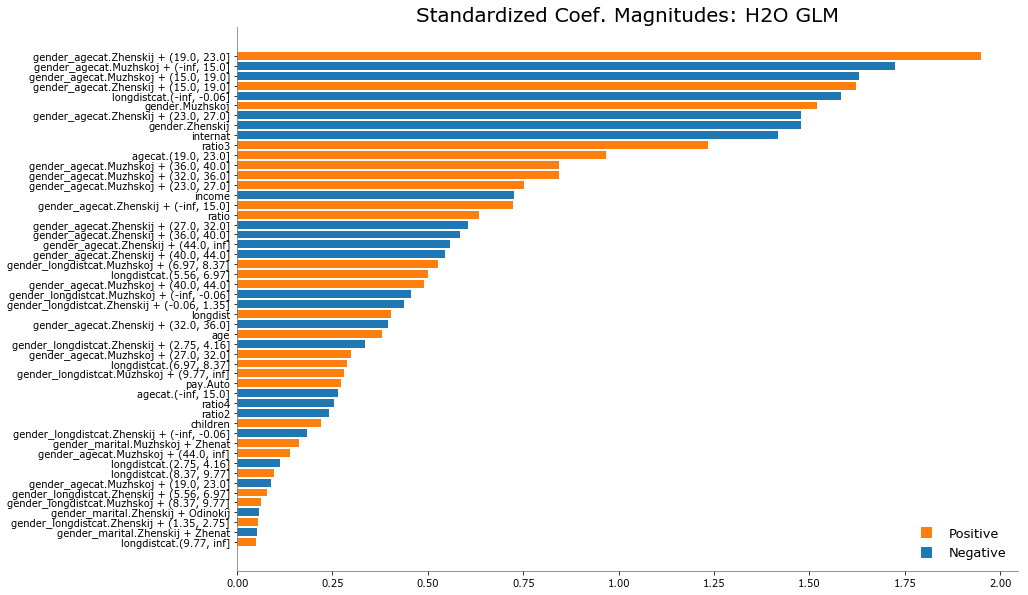

In [74]:
# выведем визуализацию значений
# первых 50 коэффициентов
glm_model.std_coef_plot(50)

In [75]:
# выведем полный регуляризационный путь
H2OGeneralizedLinearEstimator.getGLMRegularizationPath(glm_model)

{'lambdas': [0.00031121627630842147],
 'explained_deviance_train': [1.7299521358336516],
 'explained_deviance_valid': [1.729472861420466],
 'coefficients': [{'gender_agecat.Muzhskoj + (-inf, 15.0]': 1.7248346221155397,
   'gender_agecat.Muzhskoj + (15.0, 19.0]': 1.628883811251285,
   'gender_agecat.Muzhskoj + (19.0, 23.0]': 0.08995281863858504,
   'gender_agecat.Muzhskoj + (23.0, 27.0]': -0.7516342161495307,
   'gender_agecat.Muzhskoj + (27.0, 32.0]': -0.29838094746659993,
   'gender_agecat.Muzhskoj + (32.0, 36.0]': -0.8438306836025786,
   'gender_agecat.Muzhskoj + (36.0, 40.0]': -0.8445780511003316,
   'gender_agecat.Muzhskoj + (40.0, 44.0]': -0.48910518925081914,
   'gender_agecat.Muzhskoj + (44.0, inf]': -0.1378149314092014,
   'gender_agecat.Zhenskij + (-inf, 15.0]': -0.7223004497851395,
   'gender_agecat.Zhenskij + (15.0, 19.0]': -1.6234415086619074,
   'gender_agecat.Zhenskij + (19.0, 23.0]': -1.9499864032250007,
   'gender_agecat.Zhenskij + (23.0, 27.0]': 1.4778409931185672,
   

In [76]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model2 = H2OGeneralizedLinearEstimator(family = "binomial", 
                                           interactions = ['longdistcat', 'marital'])
# обучаем модель
glm_model2.train(predictors, dependent, training_frame = tr, 
                validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [77]:
# смотрим модель
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1532772228192_4


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10489353604073326
RMSE: 0.32387271580164523
LogLoss: 0.33079638489702307
Null degrees of freedom: 3101
Residual degrees of freedom: 3036
Null deviance: 4249.593703095778
Residual deviance: 2052.260771901131
AIC: 2184.260771901131
AUC: 0.9249291222056147
Gini: 0.8498582444112295
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3294666532972253: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1371.0,378.0,0.2161,(378.0/1749.0)
Uhodit,60.0,1293.0,0.0443,(60.0/1353.0)
Total,1431.0,1671.0,0.1412,(438.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3294667,0.8551587,260.0
max f2,0.1997476,0.9189339,295.0
max f0point5,0.5127488,0.8154593,218.0
max accuracy,0.3906865,0.8613798,245.0
max precision,0.9980352,1.0,0.0
max recall,0.0318357,1.0,368.0
max specificity,0.9980352,1.0,0.0
max absolute_mcc,0.3294667,0.7356850,260.0
max min_per_class_accuracy,0.5622867,0.8410520,198.0
max mean_per_class_accuracy,0.3906865,0.8700442,245.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106383,0.9968655,2.2926829,2.2926829,1.0,1.0,0.0243902,0.0243902,129.2682927,129.2682927
,2,0.0203095,0.9961456,2.2926829,2.2926829,1.0,1.0,0.0221729,0.0465632,129.2682927,129.2682927
,3,0.0306254,0.9947823,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0702143,129.2682927,129.2682927
,4,0.0406190,0.9939946,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0931264,129.2682927,129.2682927
,5,0.0502901,0.9930861,2.2926829,2.2926829,1.0,1.0,0.0221729,0.1152993,129.2682927,129.2682927
,6,0.1005803,0.9748831,2.1310194,2.2118512,0.9294872,0.9647436,0.1071693,0.2224686,113.1019387,121.1851157
,7,0.1508704,0.8959233,1.9840525,2.1359183,0.8653846,0.9316239,0.0997783,0.3222469,98.4052533,113.5918282
,8,0.2001934,0.8231153,1.7831978,2.0490161,0.7777778,0.8937198,0.0879527,0.4101996,78.3197832,104.9016142
,9,0.3007737,0.7278584,1.8664790,1.9879748,0.8141026,0.8670954,0.1877310,0.5979305,86.6479049,98.7974799
,10,0.4000645,0.6290596,1.5855242,1.8880918,0.6915584,0.8235294,0.1574279,0.7553585,58.5524232,88.8091822




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.11004754131893607
RMSE: 0.33173414252822403
LogLoss: 0.3514403026547256
Null degrees of freedom: 1328
Residual degrees of freedom: 1263
Null deviance: 1821.8635267830318
Residual deviance: 934.1283244562607
AIC: 1066.1283244562605
AUC: 0.9167253205260907
Gini: 0.8334506410521814
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39022196546997223: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,590.0,157.0,0.2102,(157.0/747.0)
Uhodit,35.0,547.0,0.0601,(35.0/582.0)
Total,625.0,704.0,0.1445,(192.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3902220,0.8506998,239.0
max f2,0.2041385,0.9147910,281.0
max f0point5,0.5973708,0.8132933,190.0
max accuracy,0.3902220,0.8555305,239.0
max precision,0.9980495,1.0,0.0
max recall,0.0654702,1.0,339.0
max specificity,0.9980495,1.0,0.0
max absolute_mcc,0.3902220,0.7253255,239.0
max min_per_class_accuracy,0.5914303,0.8406961,192.0
max mean_per_class_accuracy,0.3902220,0.8648443,239.0


Gains/Lift Table: Avg response rate: 43,79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9968683,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0210685,0.9963774,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0481100,128.3505155,128.3505155
,3,0.0300978,0.9955573,2.2835052,2.2835052,1.0,1.0,0.0206186,0.0687285,128.3505155,128.3505155
,4,0.0406321,0.9948331,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0927835,128.3505155,128.3505155
,5,0.0511663,0.9932503,2.2835052,2.2835052,1.0,1.0,0.0240550,0.1168385,128.3505155,128.3505155
,6,0.1000752,0.9792307,1.9321967,2.1118130,0.8461538,0.9248120,0.0945017,0.2113402,93.2196669,111.1813038
,7,0.1504891,0.9040851,1.9767657,2.0665722,0.8656716,0.905,0.0996564,0.3109966,97.6765656,106.6572165
,8,0.2001505,0.8305877,1.7991253,2.0002132,0.7878788,0.8759398,0.0893471,0.4003436,79.9125273,100.0213162
,9,0.3002257,0.7340429,1.7169212,1.9057825,0.7518797,0.8345865,0.1718213,0.5721649,71.6921169,90.5782497
,10,0.4003010,0.6494633,1.7855980,1.8757364,0.7819549,0.8214286,0.1786942,0.7508591,78.5598016,87.5736377



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-07-28 13:04:02,0.000 sec,0,2124.7968515,0.6849764
,2018-07-28 13:04:02,0.048 sec,1,1198.9578950,0.3900480
,2018-07-28 13:04:02,0.076 sec,2,1059.0699698,0.3469503
,2018-07-28 13:04:02,0.097 sec,3,1029.8276335,0.3390326
,2018-07-28 13:04:02,0.116 sec,4,1026.2229241,0.3384081
,2018-07-28 13:04:02,0.133 sec,5,1026.1303860,0.3384084


In [78]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver = 'IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(lambda_ = 0, family = 'binomial', solver = 'IRLSM',
                                           remove_collinear_columns = True,
                                           compute_p_values = True)
# обучаем модель
glm_model3.train(predictors, dependent, training_frame = tr, 
                 validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [79]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pondas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,5.866987,1.142989,5.133021,2.851279e-07,0.923956
1,"gender_agecat.Muzhskoj + (15.0, 19.0]",-0.332974,0.419397,-0.793936,4.272330e-01,-0.332974
2,"gender_agecat.Muzhskoj + (19.0, 23.0]",-2.838327,0.606495,-4.679888,2.870311e-06,-2.838327
3,"gender_agecat.Muzhskoj + (23.0, 27.0]",-2.818392,0.764962,-3.684355,2.292828e-04,-2.818392
4,"gender_agecat.Muzhskoj + (27.0, 32.0]",-2.146758,0.919296,-2.335218,1.953201e-02,-2.146758
5,"gender_agecat.Muzhskoj + (32.0, 36.0]",-2.645743,1.128402,-2.344682,1.904334e-02,-2.645743
6,"gender_agecat.Muzhskoj + (36.0, 40.0]",-2.608815,1.288735,-2.024323,4.293698e-02,-2.608815
7,"gender_agecat.Muzhskoj + (40.0, 44.0]",-2.078822,1.475557,-1.408839,1.588828e-01,-2.078822
8,"gender_agecat.Muzhskoj + (44.0, inf]",-1.564605,1.676835,-0.933071,3.507834e-01,-1.564605
9,"gender_agecat.Zhenskij + (-inf, 15.0]",4.793621,65.365097,0.073336,9.415387e-01,4.793621


In [80]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha': [0, 0.02, 0.04, 0.06, 0.08, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family = 'binomial', lambda_search = True),
                           grid_id = "gridresults", hyper_params = hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame = tr, 
                 nfolds = 5, 
                 keep_cross_validation_predictions = True, 
                 seed = 1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [81]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha            model_ids              logloss
0     [1.0]  gridresults_model_5   0.3460654687530632
1    [0.08]  gridresults_model_4   0.3475358947172643
2    [0.06]  gridresults_model_3  0.34755442385265967
3    [0.04]  gridresults_model_2    0.347593955553065
4     [0.0]  gridresults_model_0   0.3476279042300837
5    [0.02]  gridresults_model_1   0.3482388271182979


In [82]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by = "auc", decreasing = True)
gridperf

      alpha            model_ids                 auc
0     [1.0]  gridresults_model_5   0.916196437030642
1    [0.06]  gridresults_model_3  0.9159912728084088
2    [0.08]  gridresults_model_4  0.9159834550162124
3    [0.04]  gridresults_model_2  0.9159517612640652
4     [0.0]  gridresults_model_0  0.9159160529699792
5    [0.02]  gridresults_model_1  0.9157324404992061


In [83]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gridresults_model_5


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10587615254568133
RMSE: 0.32538615911817964
LogLoss: 0.3335575513279827
Null degrees of freedom: 3101
Residual degrees of freedom: 3060
Null deviance: 4249.593703095778
Residual deviance: 2069.391048438805
AIC: 2153.391048438805
AUC: 0.9232618195509883
Gini: 0.8465236391019766
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35226016917464165: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1381.0,368.0,0.2104,(368.0/1749.0)
Uhodit,68.0,1285.0,0.0503,(68.0/1353.0)
Total,1449.0,1653.0,0.1406,(436.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3522602,0.8549568,252.0
max f2,0.1624292,0.9186478,306.0
max f0point5,0.5181395,0.8143147,212.0
max accuracy,0.3522602,0.8594455,252.0
max precision,0.9972689,1.0,0.0
max recall,0.0434313,1.0,357.0
max specificity,0.9972689,1.0,0.0
max absolute_mcc,0.3522602,0.7348770,252.0
max min_per_class_accuracy,0.5774767,0.8410520,191.0
max mean_per_class_accuracy,0.3522602,0.8696677,252.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106383,0.9962236,2.2926829,2.2926829,1.0,1.0,0.0243902,0.0243902,129.2682927,129.2682927
,2,0.0203095,0.9954479,2.2926829,2.2926829,1.0,1.0,0.0221729,0.0465632,129.2682927,129.2682927
,3,0.0309478,0.9941790,2.2926829,2.2926829,1.0,1.0,0.0243902,0.0709534,129.2682927,129.2682927
,4,0.0406190,0.9934117,2.2926829,2.2926829,1.0,1.0,0.0221729,0.0931264,129.2682927,129.2682927
,5,0.0506125,0.9924294,2.2187254,2.2780799,0.9677419,0.9936306,0.0221729,0.1152993,121.8725413,127.8079851
,6,0.1002579,0.9682024,2.1438074,2.2115912,0.9350649,0.9646302,0.1064302,0.2217295,114.3807412,121.1591248
,7,0.1505480,0.8825002,1.9399625,2.1208544,0.8461538,0.9250535,0.0975610,0.3192905,93.9962477,112.0854442
,8,0.2001934,0.8137869,1.8907190,2.0637838,0.8246753,0.9001610,0.0938655,0.4131559,89.0719037,106.3783826
,9,0.3001289,0.7193696,1.7601888,1.9626942,0.7677419,0.8560687,0.1759054,0.5890613,76.0188828,96.2694192
,10,0.4003868,0.6322436,1.6292056,1.8791878,0.7106109,0.8196457,0.1633407,0.7524021,62.9205553,87.9187777




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1103182407088741
RMSE: 0.3321418984543716
LogLoss: 0.3460654687530632
Null degrees of freedom: 3101
Residual degrees of freedom: 3065
Null deviance: 4251.626695674246
Residual deviance: 2146.990168144004
AIC: 2220.990168144004
AUC: 0.916196437030642
Gini: 0.832392874061284
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.297469770833002: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1343.0,406.0,0.2321,(406.0/1749.0)
Uhodit,55.0,1298.0,0.0407,(55.0/1353.0)
Total,1398.0,1704.0,0.1486,(461.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2974698,0.8491986,266.0
max f2,0.1687340,0.9162196,305.0
max f0point5,0.4569660,0.8092561,227.0
max accuracy,0.4114992,0.8555770,238.0
max precision,0.9968218,1.0,0.0
max recall,0.0281935,1.0,377.0
max specificity,0.9968218,1.0,0.0
max absolute_mcc,0.2974698,0.7248020,266.0
max min_per_class_accuracy,0.5671501,0.8301887,195.0
max mean_per_class_accuracy,0.3921653,0.8641454,241.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9961284,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9949742,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0465632,129.2682927,129.2682927
,3,0.0303030,0.9939543,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0694752,129.2682927,129.2682927
,4,0.0402966,0.9928445,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0923873,129.2682927,129.2682927
,5,0.0506125,0.9914945,2.2210366,2.2780799,0.96875,0.9936306,0.0229120,0.1152993,122.1036585,127.8079851
,6,0.1002579,0.9670633,2.1438074,2.2115912,0.9350649,0.9646302,0.1064302,0.2217295,114.3807412,121.1591248
,7,0.1502257,0.8839458,1.8785208,2.1008060,0.8193548,0.9163090,0.0938655,0.3155950,87.8520850,110.0806030
,8,0.2001934,0.8167808,1.8045633,2.0268646,0.7870968,0.8840580,0.0901700,0.4057650,80.4563336,102.6864616
,9,0.3001289,0.7133330,1.7010228,1.9183673,0.7419355,0.8367347,0.1699926,0.5757576,70.1022817,91.8367347
,10,0.4003868,0.6273558,1.6513215,1.8514984,0.7202572,0.8075684,0.1655580,0.7413156,65.1321465,85.1498370



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8581477,0.0139020,0.8523275,0.8887122,0.8571429,0.8278146,0.8647416
auc,0.9177564,0.0096345,0.9016108,0.9342564,0.9272696,0.9015064,0.924139
err,0.1418522,0.0139020,0.1476726,0.1112878,0.1428571,0.1721854,0.1352584
err_count,87.8,7.828154,92.0,70.0,84.0,104.0,89.0
f0point5,0.8055524,0.0235265,0.8025439,0.8597285,0.8035714,0.754717,0.8072009
---,---,---,---,---,---,---,---
r2,0.5528088,0.0275659,0.5145544,0.5983778,0.5736083,0.4985583,0.5789454
recall,0.9489671,0.0101331,0.9498208,0.9268293,0.9492188,0.9469388,0.9720280
residual_deviance,427.8032,19.022673,459.85468,414.9719,383.92282,450.0613,430.20523
rmse,0.3310475,0.0094515,0.3464683,0.3156546,0.3237547,0.3476991,0.3216605



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-07-28 13:04:27,0.000 sec,1,",16E0",1,1.3699528,nan,1.3705044,0.0041932
,2018-07-28 13:04:27,0.004 sec,3,",14E0",2,1.3531652,nan,1.3698415,0.0044106
,2018-07-28 13:04:27,0.009 sec,5,",13E0",3,1.3358450,nan,1.3693409,0.0048581
,2018-07-28 13:04:27,0.012 sec,7,",12E0",5,1.3148538,nan,1.3607214,0.0064465
,2018-07-28 13:04:27,0.016 sec,9,",11E0",5,1.2625842,nan,1.3457027,0.0055894
---,---,---,---,---,---,---,---,---,---
,2018-07-28 13:04:27,0.239 sec,108,",77E-3",41,0.6677304,nan,0.6925928,0.0210271
,2018-07-28 13:04:28,0.242 sec,109,",71E-3",42,0.6671151,nan,0.6925210,0.0212701
,2018-07-28 13:04:28,0.245 sec,110,",64E-3",43,0.6665772,nan,0.6925465,0.0215197
,2018-07-28 13:04:28,0.248 sec,111,",59E-3",43,0.6661229,nan,0.6926244,0.0217613



See the whole table with table.as_data_frame()


In [84]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.9162629901047489


In [85]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()['regularization']

['Lasso (lambda = 7.057E-4 )']